In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set()

In [4]:
data=pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
data.shape

(768, 9)

<AxesSubplot:>

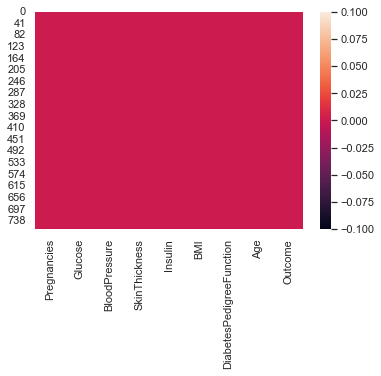

In [31]:
sns.heatmap(data.isnull())

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


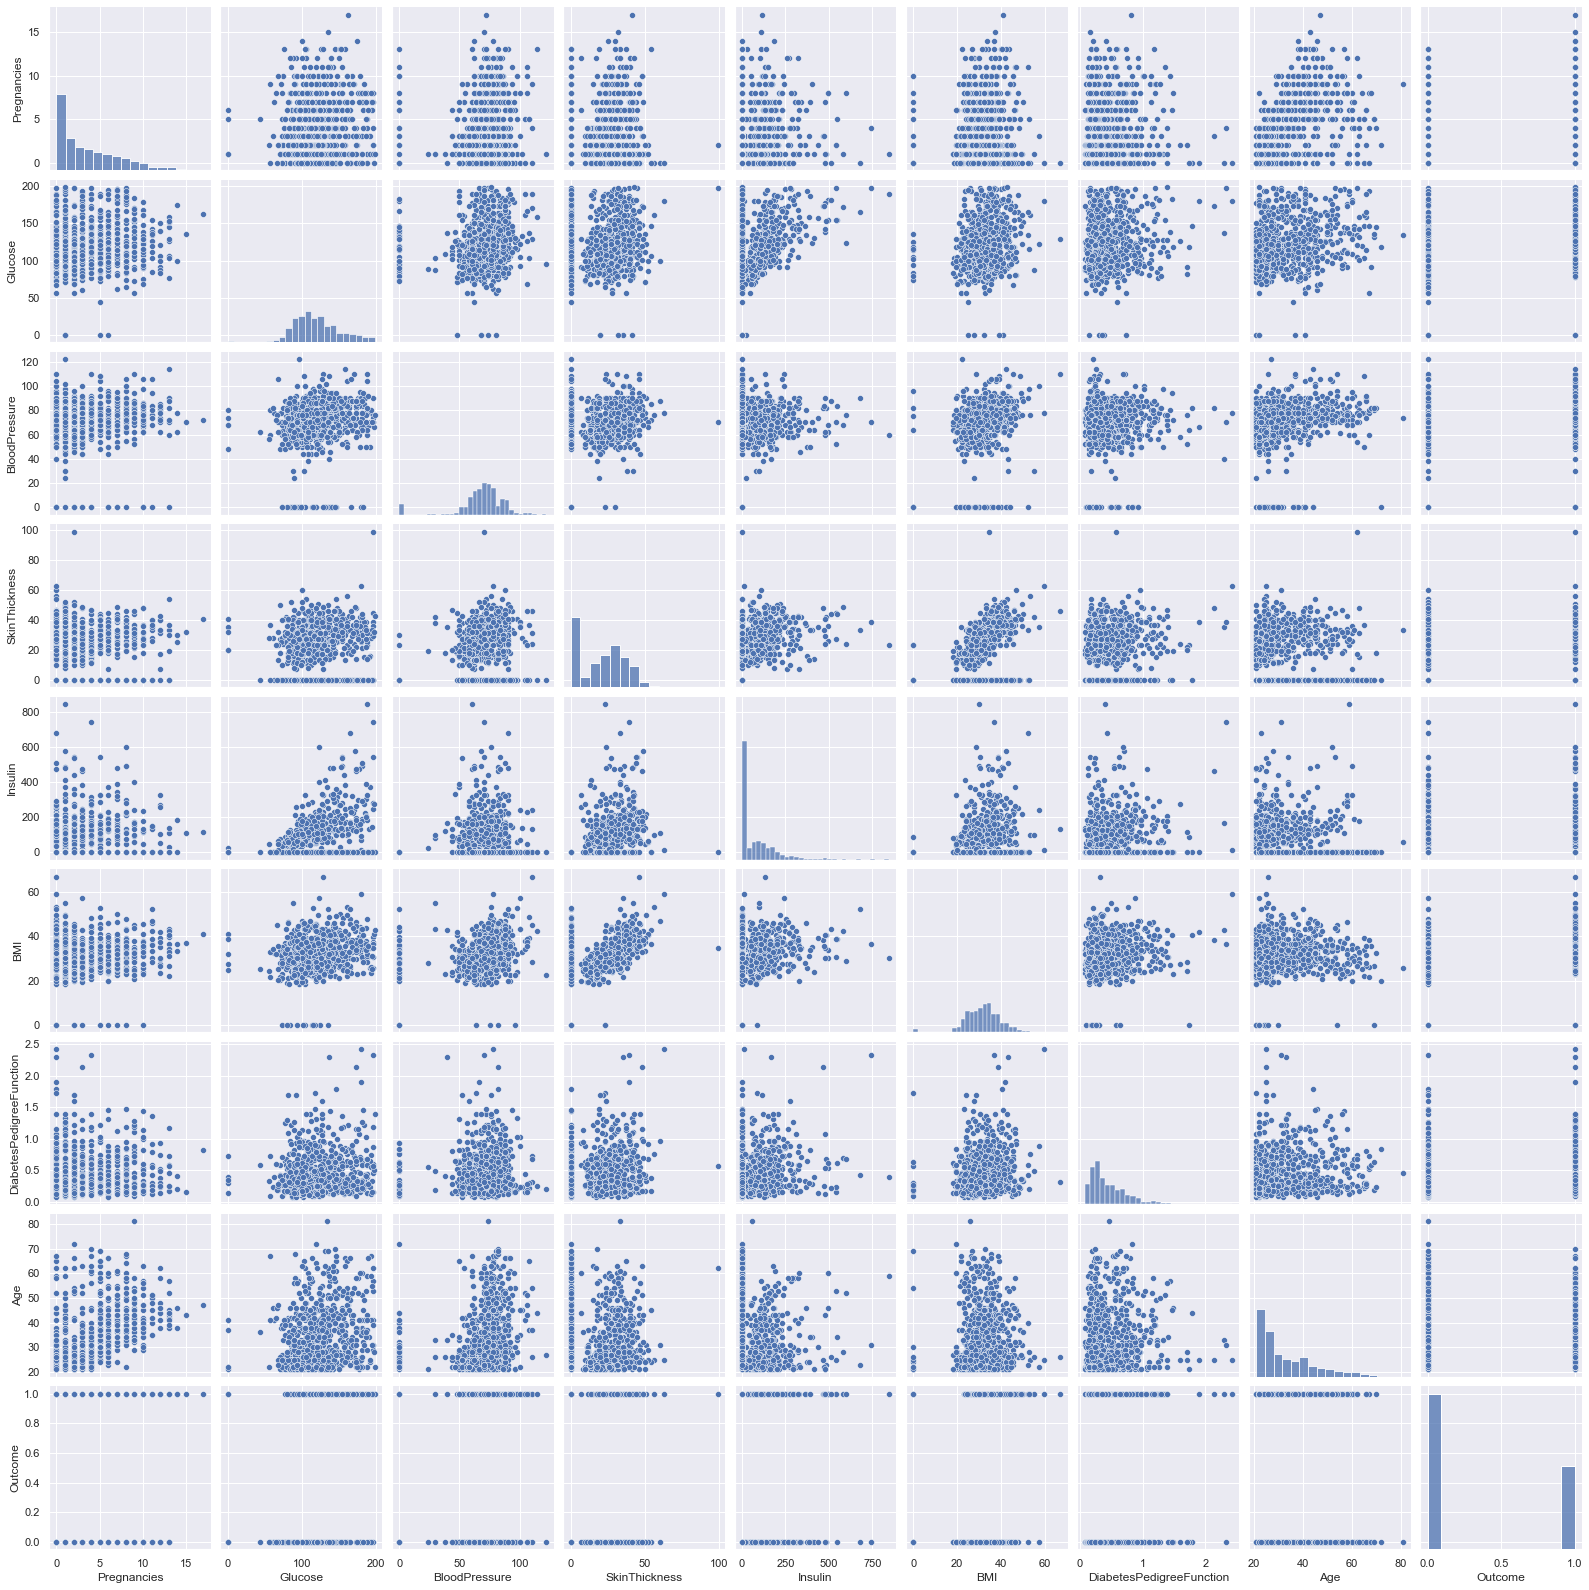

In [8]:
sns.pairplot(data)

<AxesSubplot:>

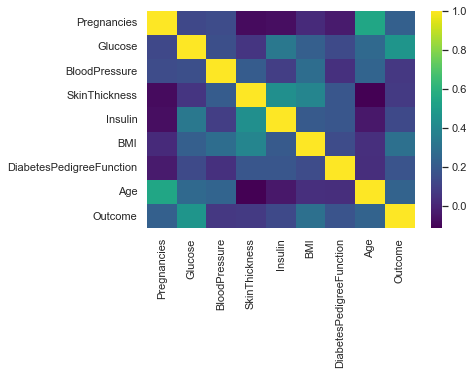

In [9]:
sns.heatmap(data.corr(),cmap='viridis')

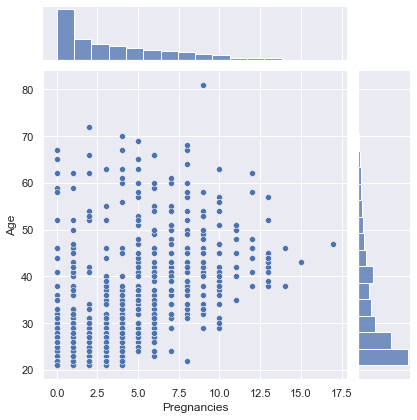

In [10]:
sns.jointplot(x='Pregnancies',y='Age',data=data)

In [11]:
X=data.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y=data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
y_test.shape

(154,)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model=LogisticRegression(max_iter=1000)

In [18]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
prediction=model.predict_proba(X_test)[:,1]

In [20]:
from sklearn.metrics import roc_curve

In [21]:
fpr,tpr,thresholds=roc_curve(y_test,prediction)

In [22]:
y_test.shape

(154,)

In [23]:
thresholds

array([1.97114524, 0.97114524, 0.96813914, 0.95630746, 0.90266173,
       0.89739655, 0.80100404, 0.77820737, 0.77796412, 0.77738169,
       0.73297249, 0.72433252, 0.6833346 , 0.67526273, 0.66102625,
       0.66060847, 0.65561708, 0.64970917, 0.63932003, 0.61672224,
       0.60581793, 0.58367596, 0.55022488, 0.53955103, 0.53416641,
       0.50301778, 0.50242378, 0.42046864, 0.42022773, 0.40859693,
       0.38085309, 0.3390035 , 0.32719525, 0.30300436, 0.3026572 ,
       0.25728245, 0.24068259, 0.22532297, 0.22516069, 0.20841322,
       0.20489223, 0.16353768, 0.14039648, 0.1281953 , 0.12695611,
       0.11447341, 0.11430132, 0.04150937, 0.0404478 , 0.00416846])

Text(0, 0.5, 'TRUE +ve RATE')

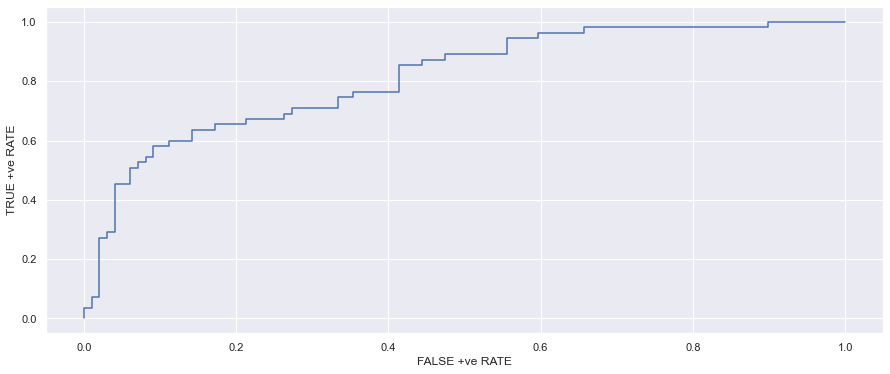

In [24]:
plt.figure(figsize=(15,6))
plt.plot(fpr,tpr)
plt.xlabel('FALSE +ve RATE')
plt.ylabel('TRUE +ve RATE')

In [35]:
optimalidx=np.argmax(tpr-fpr)
optimal=thresholds[optimalidx]

In [36]:
optimal

0.5502248835202432

In [27]:
#fpr[optimalidx]